<div style="text-align: center;">

# Generación de animaciones
</div>


<div style="text-align: center;">

## Optimización Numérica

</div>


<div style="text-align: center;">

### Función de Rastrigin

</div>


In [1]:
# Se importan las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Se define la función generalizada para cualquier dimensión

def rastrigin(x):
  A = 10
  x = np.atleast_1d(x)
  return A*len(x)+sum([(xi**2-A*np.cos(2*np.pi*xi)) for xi in x])

# Se define su respectivo gradiente para la optimización

def rastrigin_grad(x):
  A = 10
  x = np.atleast_1d(x)
  return np.array([2*xi+2*np.pi*A*np.sin(2*np.pi*xi) for xi in x])

In [3]:
# Algoritmo de descenso por gradiente

def descenso_por_gradiente(fcn, grad_fcn, dim, paso_inicial=0.1, max_iter=10000, tol=1e-6, decay_rate=0.001):
    # Inicialización del punto inicial aleatorio en el rango adecuado
    x = np.random.uniform(-5.12 if fcn == rastrigin else -500, 
                          5.12 if fcn == rastrigin else 500, 
                          size=dim)
    hist = [x.copy()]  # Historial de posiciones

    for iteración in range(max_iter):
        paso = paso_inicial * np.exp(-decay_rate * iteración) # Ajuste dinámico del tamaño de paso, disminuyendo de forma exponencial
        grad = grad_fcn(x)  # Calcula el gradiente
        x_new = x - paso * grad  # Actualiza la posición
        hist.append(x_new.copy())  # Guarda la nueva posición

        # Condición de parada: cuando el cambio entre iteraciones sea menor que la tolerancia
        if np.linalg.norm(x_new - x) < tol or np.linalg.norm(grad) < tol:
            break
        x = x_new.copy()  # Actualiza el punto actual

    return x, fcn(x), hist

In [4]:
# Se realiza la optimización en 2 dimensiones

print("Optimizando en 2 dimensiones:")
x_min_rastrigin, f_min_rastrigin, hist_rastrigin = descenso_por_gradiente(rastrigin, rastrigin_grad, 2, paso_inicial=0.1)
print(f"Función Rastrigin: se obtiene el mínimo en {x_min_rastrigin}, valor: {f_min_rastrigin}")

Optimizando en 2 dimensiones:
Función Rastrigin: se obtiene el mínimo en [3.37874078e-07 3.37874078e-07], valor: 4.529709940470639e-11


In [5]:
# Se observa el número de iteraciones que fueron necesarias
len(hist_rastrigin)

3095

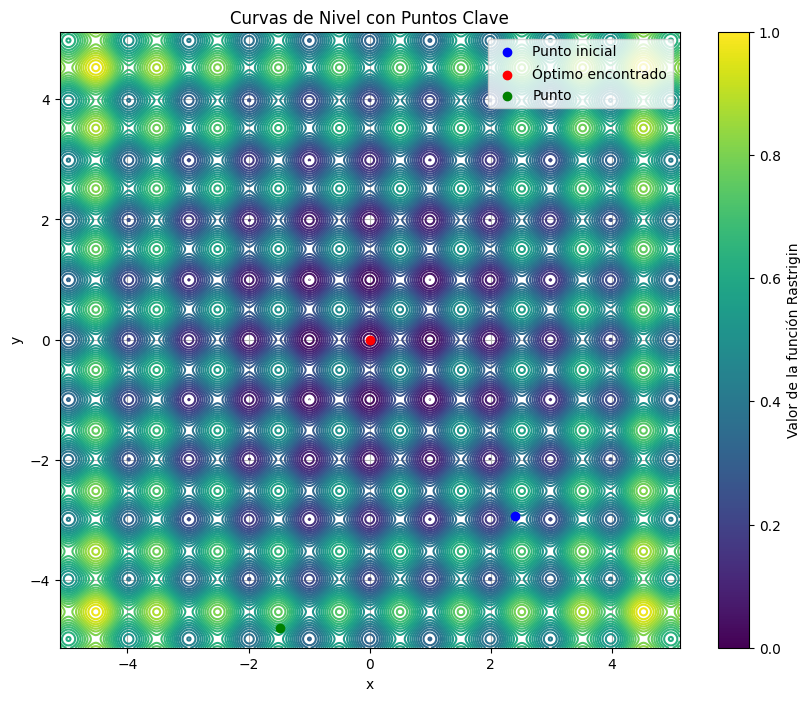

In [6]:
# A continuación se mostrará el ejemplo de la imagen inicial. Posteriormente, se guarda una imagen por cada iteración, para construir el video en una plataforma externa (Wondershare Filmora) con las imágenes obtenidas.

# Extraemos los puntos clave
punto_inicial = hist_rastrigin[0]
punto = hist_rastrigin[1]
optimo = hist_rastrigin[-1]

# Definimos las curvas de nivel
x = np.linspace(-5.12, 5.12, 500)
y = np.linspace(-5.12, 5.12, 500)
X, Y = np.meshgrid(x, y)
Z = np.array([[rastrigin([i, j]) for i, j in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

# Crear la gráfica
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=50, cmap='viridis')  # Curvas de nivel

# Graficar los puntos
plt.scatter(*punto_inicial, color='blue', label='Punto inicial', zorder=5)
plt.scatter(*optimo, color='red', label='Óptimo encontrado', zorder=5)
plt.scatter(*punto, color='green', label='Punto', zorder=5)

# Etiquetas y detalles
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de Nivel con Puntos Clave')
plt.legend()
plt.grid(True)
plt.colorbar(label='Valor de la función Rastrigin')

# Mostrar la gráfica
plt.show() 

In [ ]:
# Se extraen las imágenes necesarias para la realización del gif de la optimización

import os
import zipfile
import matplotlib.pyplot as plt

# Crear una carpeta temporal para guardar las imágenes
output_folder = "./rastrigin_frames"
os.makedirs(output_folder, exist_ok=True)

# Generar y guardar cada gráfica
for i in range(1, len(hist_rastrigin)):
    punto = hist_rastrigin[i]
    
    # Crear la gráfica
    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')  # Curvas de nivel
    plt.scatter(*punto_inicial, color='blue', label='Punto inicial', zorder=5)
    plt.scatter(*optimo, color='red', label='Óptimo encontrado', zorder=5)
    plt.scatter(*punto, color='green', label='Punto', zorder=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Curvas de Nivel con Puntos Clave - Iteración #{i}')
    plt.legend()
    plt.grid(True)
    plt.colorbar(label='Valor de la función Rastrigin')
    
    # Guardar la gráfica como imagen
    file_name = os.path.join(output_folder, f"{i}.png")
    plt.savefig(file_name)
    plt.close()

# Crear un archivo .zip con todas las imágenes
zip_file_path = "./rastrigin_frames.zip"
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for root, _, files in os.walk(output_folder):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=file)

# Mostrar al usuario el archivo generado
zip_file_path

In [8]:
# Se realiza la optimización en 3 dimensiones

print("Optimizando en 3 dimensiones:")
x_min_rastrigin, f_min_rastrigin, hist_rastrigin = descenso_por_gradiente(rastrigin, rastrigin_grad, 3, paso_inicial=0.1)
print(f"Función Rastrigin: se obtiene el mínimo en {x_min_rastrigin}, valor: {f_min_rastrigin}")

Optimizando en 3 dimensiones:
Función Rastrigin: se obtiene el mínimo en [-2.70311874e-07 -2.70311874e-07  2.70311874e-07], valor: 4.348521542851813e-11


In [9]:
# Se observa el número de iteraciones que fueron necesarias
len(hist_rastrigin)

3096

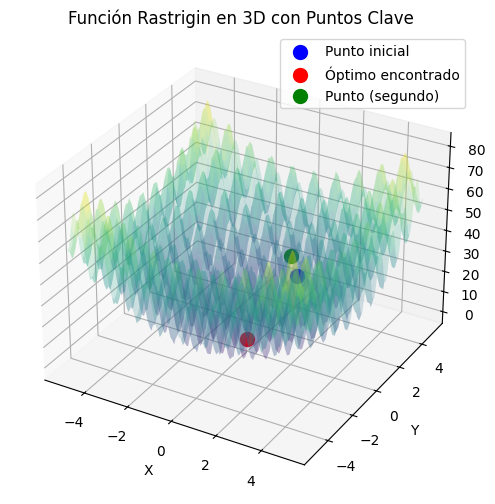

In [10]:
# A continuación se mostrará el ejemplo de la imagen inicial. Posteriormente, se guarda una imagen por cada iteración, para construir el video en una plataforma externa (Wondershare Filmora) con las imágenes obtenidas.


# Se crea una función para graficar en 3D con puntos clave
def graficar3D_con_puntos(func, x_range, y_range, title, puntos, cmap="viridis"):
    # Crear malla para la superficie
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([func([xi, yi]) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

    # Crear la figura
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor=None, alpha=0.2)  # Superficie más transparente

    # Graficar los puntos clave
    for punto, color, label in puntos:
        ax.scatter(punto[0], punto[1], func(punto), color=color, label=label, s=100, zorder=10)

    # Configuración de la gráfica
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.show()

# Dominio típico de la función Rastrigin
rastrigin_range = (-5.12, 5.12)

# Definición de los puntos clave
punto_inicial = hist_rastrigin[0]
punto = hist_rastrigin[1]
optimo = x_min_rastrigin

puntos_clave = [
    (punto_inicial, "blue", "Punto inicial"),
    (optimo, "red", "Óptimo encontrado"),
    (punto, "green", "Punto (segundo)")
]

# Llamar a la función para graficar
graficar3D_con_puntos(rastrigin, rastrigin_range, rastrigin_range, "Función Rastrigin en 3D con Puntos Clave", puntos_clave)


In [11]:
# Importar librerías necesarias
import os
import numpy as np
import matplotlib.pyplot as plt

# Crear carpeta para guardar las imágenes
output_folder = "./rastrigin_3D_frames"
os.makedirs(output_folder, exist_ok=True)

# Ciclo para iterar sobre los puntos del historial
for i in range(1, len(hist_rastrigin)):
    punto = hist_rastrigin[i]
    
    # Crear malla para la superficie
    x = np.linspace(-5.12, 5.12, 100)
    y = np.linspace(-5.12, 5.12, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([rastrigin([xi, yi]) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
    
    # Crear la figura
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor='none', alpha=0.3)  # Superficie sin bordes y semitransparente

    # Graficar los puntos clave
    ax.scatter(punto_inicial[0], punto_inicial[1], rastrigin(punto_inicial), color="blue", label="Punto inicial", s=100, zorder=10)
    ax.scatter(x_min_rastrigin[0], x_min_rastrigin[1], rastrigin(x_min_rastrigin), color="red", label="Óptimo encontrado", s=100, zorder=10)
    ax.scatter(punto[0], punto[1], rastrigin(punto), color="green", label="Punto", s=100, zorder=10)
    
    # Configuración de la gráfica
    ax.set_title(f"Función Rastrigin en 3D - Iteración #{i}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    
    # Guardar la gráfica como imagen
    file_name = os.path.join(output_folder, f"{i}.png")
    plt.savefig(file_name)
    plt.close()

print(f"Gráficas guardadas en la carpeta: {output_folder}")


C:\Users\DELL\AppData\Local\Temp\ipykernel_43180\869514579.py:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(file_name)


Gráficas guardadas en la carpeta: ./rastrigin_3D_frames


<div style="text-align: center;">

### Función de Schwefel
</div>

In [13]:
# Se define la función generalizada para cualquier dimensión
def schwefel(x):
    x = np.atleast_1d(x)
    return 418.9829 * len(x) - sum([xi * np.sin(np.sqrt(abs(xi))) for xi in x])

# Se define su respectivo gradiente para la optimización
def schwefel_grad(x):
    x = np.atleast_1d(x)
    grad = []
    for xi in x:
        if xi == 0:
            grad.append(0)  # Evitar división por cero
        else:
            grad.append(-np.sin(np.sqrt(abs(xi))) - 
                        (xi / (2 * np.sqrt(abs(xi) + 1e-8))) * np.cos(np.sqrt(abs(xi))))
    return np.array(grad)

In [12]:
# Descenso por gradiente
def descenso_por_gradiente(fcn, grad_fcn, dim, paso_inicial=0.1, max_iter=10000, tol=1e-16, decay_rate=0.001):
    # Inicialización del punto inicial aleatorio
    x = np.random.uniform(-500, 500, size=dim)
    hist = [x.copy()]  # Historial de posiciones

    for iteración in range(max_iter):
        paso = paso_inicial / (1 + decay_rate * iteración)  # Tamaño de paso dinámico
        grad = grad_fcn(x)  # Gradiente
        x_new = x - paso * grad  # Actualización de la posición
        hist.append(x_new.copy())  # Guardar posición

        # Condición de parada
        if np.linalg.norm(x_new - x) < tol :
            break
        x = x_new.copy()

    return x, fcn(x), hist

In [25]:
# Se realiza la optimización en 2 dimensiones

print("Optimizando en 2 dimensiones:")
x_min_schwefel, f_min_schwefel, hist_schwefel = descenso_por_gradiente(schwefel, schwefel_grad, dim=2)
print(f"Función Schwefel: se obtiene el mínimo en {x_min_schwefel}, valor: {f_min_schwefel}")

Optimizando en 2 dimensiones:
Función Schwefel: se obtiene el mínimo en [420.96874636 420.96874636], valor: 2.545513257246057e-05


In [26]:
len(hist_schwefel)

2356

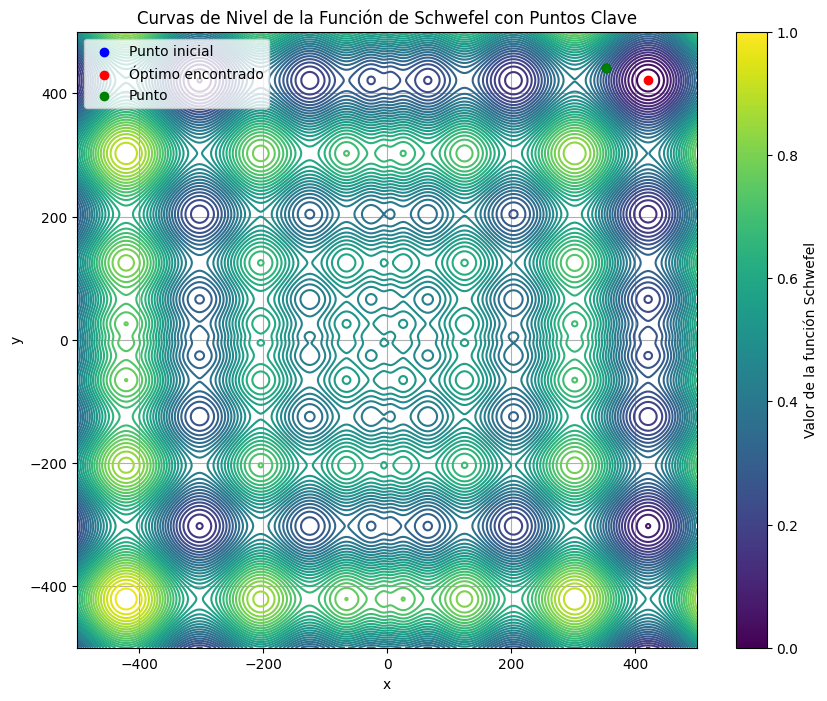

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Función de Schwefel en 2D para graficar
def schwefel_2d(x, y):
    return 418.9829 * 2 - (x * np.sin(np.sqrt(abs(x))) + y * np.sin(np.sqrt(abs(y))))

# Crear una malla para las curvas de nivel
x = np.linspace(-500, 500, 500)
y = np.linspace(-500, 500, 500)
X, Y = np.meshgrid(x, y)
Z = schwefel_2d(X, Y)

# Puntos clave
punto_inicial = hist_schwefel[0]
punto = hist_schwefel[1]
optimo = x_min_schwefel

# Crear la gráfica
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=50, cmap='viridis')  # Curvas de nivel

# Graficar los puntos clave
plt.scatter(*punto_inicial, color='blue', label='Punto inicial', zorder=5)
plt.scatter(*optimo, color='red', label='Óptimo encontrado', zorder=5)
plt.scatter(*punto, color='green', label='Punto', zorder=5)

# Etiquetas y detalles
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de Nivel de la Función de Schwefel con Puntos Clave')
plt.legend()
plt.grid(True)
plt.colorbar(label='Valor de la función Schwefel')

# Mostrar la gráfica
plt.show()

In [28]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Crear carpeta para guardar las imágenes
output_folder = "./schwefel_frames"
os.makedirs(output_folder, exist_ok=True)

# Crear malla para la función de Schwefel en 2D
x = np.linspace(-500, 500, 500)
y = np.linspace(-500, 500, 500)
X, Y = np.meshgrid(x, y)
Z = 418.9829 * 2 - (X * np.sin(np.sqrt(abs(X))) + Y * np.sin(np.sqrt(abs(Y))))

# Graficar iterativamente desde hist_schwefel[1] hasta hist_schwefel[3094]
for i in range(1, len(hist_schwefel)):
    punto = hist_schwefel[i]
    
    # Crear la gráfica
    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')  # Curvas de nivel
    plt.scatter(*hist_schwefel[0], color='blue', label='Punto inicial', zorder=5)  # Punto inicial
    plt.scatter(*x_min_schwefel, color='red', label='Óptimo encontrado', zorder=5)  # Óptimo encontrado
    plt.scatter(*punto, color='green', label='Punto', zorder=5)  # Punto actual
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Curvas de Nivel - Iteración #{i}')
    plt.legend()
    plt.grid(True)
    plt.colorbar(label='Valor de la función Schwefel')
    
    # Guardar la gráfica como imagen
    file_name = os.path.join(output_folder, f"{i}.png")
    plt.savefig(file_name)
    plt.close()

print(f"Gráficas guardadas en la carpeta: {output_folder}")

Gráficas guardadas en la carpeta: ./schwefel_frames


In [76]:
# Se realiza la optimización en 3 dimensiones

print("Optimizando en 3 dimensiones:")
x_min_schwefel, f_min_schwefel, hist_schwefel = descenso_por_gradiente(schwefel, schwefel_grad, dim=3)
print(f"Función Schwefel: se obtiene el mínimo en {x_min_schwefel}, valor: {f_min_schwefel}")

Optimizando en 3 dimensiones:
Función Schwefel: se obtiene el mínimo en [420.96874636 420.96874636 420.96874636], valor: 3.818269897237769e-05


In [77]:
len(hist_schwefel)

2399

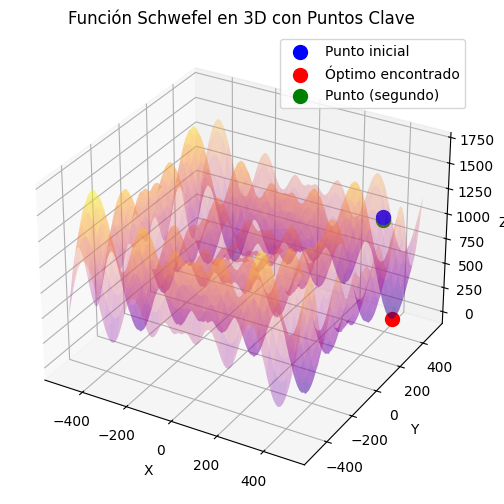

In [78]:
# Se crea una función para graficar en 3D con puntos clave
def graficar3D_con_puntos(func, x_range, y_range, title, puntos, cmap="viridis"):
    # Crear malla para la superficie
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([func([xi, yi]) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

    # Crear la figura
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor='none', alpha=0.3)  # Superficie semitransparente y sin bordes

    # Graficar los puntos clave
    for punto, color, label in puntos:
        ax.scatter(punto[0], punto[1], func(punto), color=color, label=label, s=100, zorder=10)

    # Configuración de la gráfica
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.show()

# Dominio típico de la función Schwefel
schwefel_range = (-500, 500)

# Puntos clave
punto_inicial = hist_schwefel[0]  # Punto inicial
punto = hist_schwefel[1]          # Segundo punto
optimo = x_min_schwefel           # Óptimo encontrado

# Lista de puntos clave para graficar
puntos_clave = [
    (punto_inicial, "blue", "Punto inicial"),
    (optimo, "red", "Óptimo encontrado"),
    (punto, "green", "Punto (segundo)")
]

# Graficar la función de Schwefel con puntos clave
graficar3D_con_puntos(schwefel, schwefel_range, schwefel_range, "Función Schwefel en 3D con Puntos Clave", puntos_clave, cmap="plasma")

In [79]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Crear carpeta para guardar las imágenes
output_folder = "./schwefel_3D_frames"
os.makedirs(output_folder, exist_ok=True)

# Graficar iterativamente y guardar imágenes
def graficar3D_con_puntos_iterativo(func, x_range, y_range, hist, optimo, output_folder, cmap="viridis"):
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([func([xi, yi]) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

    punto_inicial = hist[0]

    for i in range(1, len(hist)):
        punto = hist[i]

        # Crear la figura
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor='none', alpha=0.3)  # Superficie semitransparente

        # Graficar los puntos clave
        ax.scatter(punto_inicial[0], punto_inicial[1], func(punto_inicial), color='blue', label='Punto inicial', s=100, zorder=10)
        ax.scatter(optimo[0], optimo[1], func(optimo), color='red', label='Óptimo encontrado', s=100, zorder=10)
        ax.scatter(punto[0], punto[1], func(punto), color='green', label='Punto', s=100, zorder=10)

        # Configuración de la gráfica
        ax.set_title(f"Función Schwefel en 3D")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.legend()

        # Guardar la gráfica como imagen
        file_name = os.path.join(output_folder, f"{i}.png")
        plt.savefig(file_name)
        plt.close()

# Rango de la función Schwefel
schwefel_range = (-500, 500)
np.random.seed(0)  # Para reproducibilidad
x_min_schwefel = [420.9687, 420.9687]  # Óptimo supuesto

# Generar gráficas y guardarlas
graficar3D_con_puntos_iterativo(schwefel, schwefel_range, schwefel_range, hist_schwefel, x_min_schwefel, output_folder, cmap="plasma")

print(f"Gráficas guardadas en la carpeta: {output_folder}")

C:\Users\DELL\AppData\Local\Temp\ipykernel_43180\2813386237.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(file_name)


Gráficas guardadas en la carpeta: ./schwefel_3D_frames


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b83586ac-f181-4e61-8d03-82103ac52780' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>